In [186]:
# Import core libararies
import pandas as pd
import numpy as np
import cv2 

# Import plotting library
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for prediction and data handing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import roc_auc_score

#Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [187]:
# Read the training data CSV file
data = pd.read_csv("x_train_all.csv")

In [188]:
# Print the dimensions of the data
data.shape

(9690, 2304)

In [189]:
# Print basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [190]:
# Display the first 5 rows of data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [191]:
# Print some statistical description
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [192]:
#Check if any rows contain missing data
missing_data = data[data.isnull().any(axis=1)].head()

# Print the rows which contain the empty data
missing_data   

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303


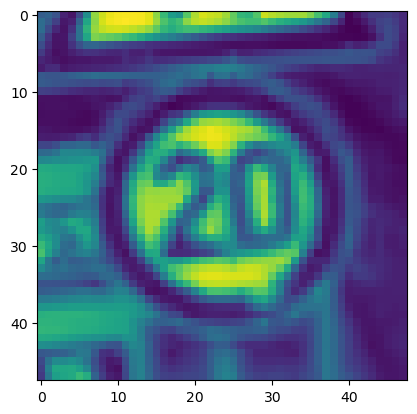

In [193]:
# Extract the eleventh row as an array
instance_to_plot = data.iloc[10].to_numpy()

# Reshape the array as 48x48 array
image_data = instance_to_plot.reshape(48, 48)

# Plot the image
plt.imshow(image_data)
plt.show()

In [194]:
# Normalize the data
data = data.astype('float') / 255

In [195]:
# Create a new dataset with feature reduction applied
data_sm = np.apply_along_axis(
    func1d=lambda item: cv2.resize(item.reshape(48, 48), dsize=(30, 30)),
    axis=1, arr=data).reshape(-1, 30*30)

# Print the dimensions of the new data
data_sm.shape

(9690, 900)

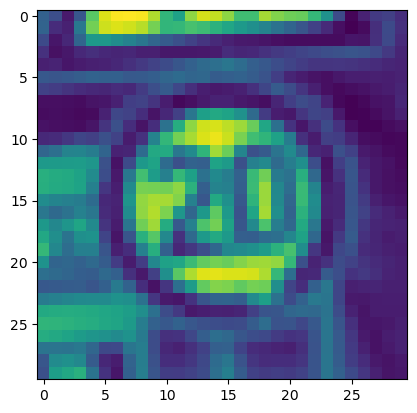

In [196]:
# Plotting the same image with reduced features
image_data = data_sm[10].reshape(30, 30)
plt.imshow(image_data)
plt.show()

In [197]:
# Read the target training data CSV file
data_train = pd.read_csv("y_train_all.csv")

In [198]:
# Splitting the data into Train and Test from traning dataset
X_train, X_test, y_train, y_test = train_test_split(data_sm, data_train, test_size = 0.3, random_state = 1)

In [199]:
# Naive Bayes on whole dataset
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred1 = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred1))
# Accuracy score
print('accuracy is',accuracy_score(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.14      0.73      0.23        55
           1       0.43      0.23      0.30       669
           2       0.41      0.19      0.26       669
           3       0.44      0.23      0.30       418
           4       0.46      0.12      0.20       613
           5       0.12      0.24      0.16        59
           6       0.09      0.70      0.16       111
           7       0.09      0.55      0.16        80
           8       0.83      0.25      0.39       150
           9       0.28      0.34      0.31        83

    accuracy                           0.24      2907
   macro avg       0.33      0.36      0.25      2907
weighted avg       0.42      0.24      0.26      2907

accuracy is 0.23873409012727898


In [200]:
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[ 39,   6,   1,   6,   2,   0,   0,   0,   0,   1],
       [116, 205,  60, 181,  44,   1,  12,   0,  29,  21],
       [  8,  56, 247, 209,  41,   1,  24,  13,  21,  49],
       [  9,   3,   8, 345,  15,   2,  12,   0,   9,  15],
       [ 25,  66,  42, 301, 137,   0,   7,  14,   4,  17],
       [  0,   0,   1,   7,   2,  22,   2,  21,   1,   3],
       [  0,   0,   0,  40,   2,   0,  54,   7,   0,   8],
       [  0,   0,   3,   2,   0,   0,  27,  38,   2,   8],
       [  0,   1,   2,  22,   0,   0,  13,  26,  73,  13],
       [  0,   3,   1,   3,   0,   0,   8,   9,   5,  54]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted')

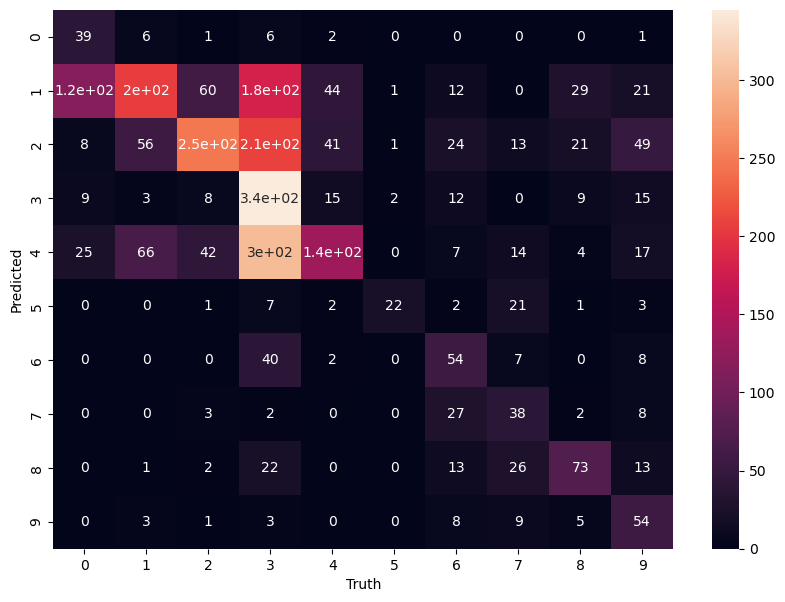

In [201]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [202]:
n_classes = 10  # Number of classes
y_true = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # One-hot encoding of true labels
y_scores = np.random.rand(len(y_pred1), n_classes)  # predicted probabilities

In [203]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [204]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

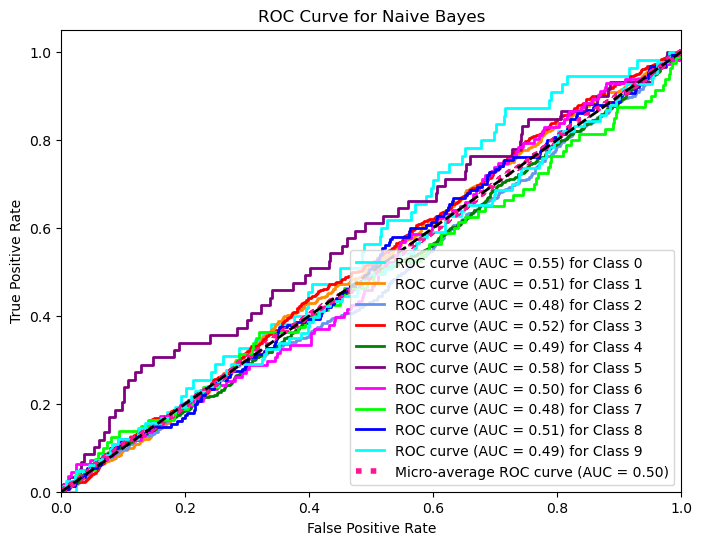

In [205]:
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'magenta', 'lime', 'blue', 'cyan']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for Class {i}')

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='Micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [206]:
data1 = pd.read_csv("subset_1.csv") #contains 5 top features for each of 10 classes: 5*10 = 50 features
data2 = pd.read_csv("subset_2.csv") #contains 10 top features for each of 10 classes: 10*10 = 100 features 
data3 = pd.read_csv("subset_3.csv") #contains 20 top features for each of 10 classes: 10*3 = 200 features

In [207]:
data1.head()

,2261,2262,2263,2213,2260,1073,1121,1120,1074,1072,...,1695,1694,1714,1715,1666,608,560,509,510,508
0,0.282353,0.278431,0.266667,0.286275,0.286275,0.682353,0.772549,0.811765,0.639216,0.721569,...,0.431373,0.411765,0.388235,0.372549,0.400000,0.415686,0.431373,0.458824,0.419608,0.474510
1,0.333333,0.298039,0.274510,0.349020,0.356863,0.752941,0.796078,0.717647,0.764706,0.662745,...,0.388235,0.392157,0.462745,0.435294,0.388235,0.462745,0.501961,0.474510,0.541176,0.549020
2,0.317647,0.278431,0.258824,0.360784,0.352941,0.749020,0.811765,0.827451,0.701961,0.768627,...,0.419608,0.427451,0.478431,0.447059,0.396078,0.466667,0.494118,0.537255,0.549020,0.529412
3,0.360784,0.317647,0.282353,0.392157,0.337255,0.800000,0.854902,0.890196,0.811765,0.835294,...,0.431373,0.435294,0.486275,0.454902,0.443137,0.454902,0.494118,0.439216,0.486275,0.392157
4,0.494118,0.498039,0.501961,0.541176,0.482353,0.635294,0.666667,0.698039,0.588235,0.639216,...,0.309804,0.364706,0.341176,0.317647,0.407843,0.470588,0.454902,0.419608,0.411765,0.411765


In [208]:
data1.shape

(9690, 46)

In [209]:
data2.shape

(9690, 85)

In [210]:
data3.shape

(9690, 158)

In [211]:
data_train.shape

(9690, 1)

In [212]:
# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(data1, data_train, test_size = 0.3, random_state = 0)

In [213]:
# Naive Bayes 1
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred2 = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred2))
# Accuracy score
print('accuracy is',accuracy_score(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.20      0.60      0.30        65
           1       0.67      0.27      0.39       650
           2       0.63      0.36      0.46       676
           3       0.31      0.75      0.44       426
           4       0.54      0.24      0.33       587
           5       0.78      0.49      0.60        74
           6       0.20      0.40      0.27       114
           7       0.32      0.44      0.37        71
           8       0.38      0.40      0.39       176
           9       0.22      0.65      0.33        68

    accuracy                           0.40      2907
   macro avg       0.43      0.46      0.39      2907
weighted avg       0.52      0.40      0.40      2907

accuracy is 0.3955968352253182


In [214]:
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[ 39,   9,   2,   5,   5,   0,   0,   0,   3,   2],
       [118, 178,  58, 169,  50,   1,  21,   0,  35,  20],
       [ 14,  29, 245, 189,  44,   2,  51,   7,  45,  50],
       [  7,   1,  17, 321,   9,   0,  36,   1,  10,  24],
       [ 14,  45,  61, 285, 140,   0,  10,   2,  12,  18],
       [  0,   0,   1,  11,   7,  36,   6,   5,   6,   2],
       [  0,   2,   0,  43,   3,   0,  46,  10,   2,   8],
       [  0,   0,   2,   1,   0,   0,  27,  31,   0,  10],
       [  2,   0,   2,  23,   0,   7,  18,  33,  70,  21],
       [  0,   0,   0,   2,   1,   0,  12,   7,   2,  44]], dtype=int64)

In [215]:
# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(data2, data_train, test_size = 0.3, random_state = 1)

In [216]:
# Naive Bayes 2
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred3 = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred3))
# Accuracy score
print('accuracy is',accuracy_score(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.20      0.71      0.31        55
           1       0.60      0.31      0.41       669
           2       0.68      0.37      0.48       669
           3       0.31      0.83      0.45       418
           4       0.56      0.22      0.32       613
           5       0.85      0.37      0.52        59
           6       0.34      0.49      0.40       111
           7       0.30      0.47      0.37        80
           8       0.51      0.49      0.50       150
           9       0.29      0.65      0.40        83

    accuracy                           0.42      2907
   macro avg       0.46      0.49      0.41      2907
weighted avg       0.53      0.42      0.41      2907

accuracy is 0.4176126590987272


In [217]:
cm3 = confusion_matrix(y_test, y_pred)
cm3

array([[ 39,   6,   1,   6,   2,   0,   0,   0,   0,   1],
       [116, 205,  60, 181,  44,   1,  12,   0,  29,  21],
       [  8,  56, 247, 209,  41,   1,  24,  13,  21,  49],
       [  9,   3,   8, 345,  15,   2,  12,   0,   9,  15],
       [ 25,  66,  42, 301, 137,   0,   7,  14,   4,  17],
       [  0,   0,   1,   7,   2,  22,   2,  21,   1,   3],
       [  0,   0,   0,  40,   2,   0,  54,   7,   0,   8],
       [  0,   0,   3,   2,   0,   0,  27,  38,   2,   8],
       [  0,   1,   2,  22,   0,   0,  13,  26,  73,  13],
       [  0,   3,   1,   3,   0,   0,   8,   9,   5,  54]], dtype=int64)

In [218]:
# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(data3, data_train, test_size = 0.3, random_state = 0)

In [219]:
# Naive Bayes on dataset3
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred4 = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred4))
# Accuracy score
print('accuracy is',accuracy_score(y_pred4,y_test))

              precision    recall  f1-score   support

           0       0.19      0.72      0.31        65
           1       0.55      0.28      0.37       650
           2       0.59      0.34      0.43       676
           3       0.33      0.71      0.45       426
           4       0.46      0.22      0.30       587
           5       0.82      0.24      0.38        74
           6       0.20      0.52      0.29       114
           7       0.20      0.45      0.28        71
           8       0.54      0.40      0.46       176
           9       0.25      0.50      0.33        68

    accuracy                           0.38      2907
   macro avg       0.41      0.44      0.36      2907
weighted avg       0.48      0.38      0.38      2907

accuracy is 0.38011695906432746


In [220]:
cm = confusion_matrix(y_test, y_pred4)
cm

array([[ 47,   4,   3,   2,   6,   0,   0,   0,   0,   3],
       [134, 181,  93, 122,  48,   0,  41,   0,  21,  10],
       [ 19,  71, 229, 173,  81,   1,  39,  14,  11,  38],
       [ 13,   2,  14, 303,  18,   0,  47,   2,  15,  12],
       [ 28,  67,  42, 265, 132,   0,  24,  11,   3,  15],
       [  0,   0,   0,  11,   0,  18,   9,  30,   6,   0],
       [  0,   3,   0,  27,   0,   0,  59,  13,   2,  10],
       [  0,   0,   3,   3,   0,   0,  31,  32,   0,   2],
       [  1,   1,   2,   8,   0,   3,  35,  44,  70,  12],
       [  0,   0,   0,   3,   0,   0,  14,  15,   2,  34]], dtype=int64)